In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-ours.pkl", "rb") as pkl:
    data = pickle.load(pkl)

data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions,...,value_eps,vi_iter,vi_time,vi_start_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time
0,eth-2-ms-10,ethereum-wp-2,0,10,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),210.952044,145920,6,420004,...,0.01,817,199.872828,54.978140,1009,1009,0.078943,0.572829,2,0.370959
1,eth-3-ms-10,ethereum-wp-3,0,10,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),492.515748,337329,7,914411,...,0.01,585,310.327245,24.134775,1425,1425,0.197596,0.255219,2,0.529811
2,par-4-ms-13,parallel-4,0,13,"sm.SelfishMining(Parallel(k=4), alpha=0.125, g...",Parallel(k=4),528.641074,205225,11,983993,...,0.01,715,376.525145,40.491193,554,554,0.018143,0.423939,2,0.207479
3,btc-ms-23,bitcoin,0,23,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),776.552172,188793,3,941551,...,0.01,353,179.026195,9.025925,1178,1178,0.126606,0.111111,2,0.456803
4,byz-2-ms-10,ethereum-bz-2,0,10,"sm.SelfishMining(EthereumByzantium(horizon=2),...",EthereumByzantium(horizon=2),218.386156,145522,5,418606,...,0.01,550,129.026979,26.550455,1546,1546,0.248096,0.284126,2,0.576199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,byz-3-ms-10,ethereum-bz-3,0,10,"sm.SelfishMining(EthereumByzantium(horizon=3),...",EthereumByzantium(horizon=3),494.339277,337305,7,914291,...,0.01,348,179.899169,8.658661,2089,2089,0.557478,0.105322,2,0.754733
236,par-4-ms-13,parallel-4,0,13,"sm.SelfishMining(Parallel(k=4), alpha=0.125, g...",Parallel(k=4),528.641074,205225,11,983993,...,0.01,641,333.804821,31.324870,554,554,0.017560,0.332023,2,0.207177
237,eth-3-ms-10,ethereum-wp-3,0,10,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),492.515748,337329,7,914411,...,0.01,618,321.472304,31.293177,1417,1417,0.187143,0.329339,2,0.499780
238,byz-3-ms-10,ethereum-bz-3,0,10,"sm.SelfishMining(EthereumByzantium(horizon=3),...",EthereumByzantium(horizon=3),494.339277,337305,7,914291,...,0.01,18,9.399219,0.000000,18,18,0.000732,0.000000,2,0.005967


In [3]:
data[(data.ss_n - data.ss_nonzero) != 0].drop(columns=["model_hum", "protocol_hum"])

,key,protocol,maximum_height,maximum_size,time,n_states,n_actions,n_transitions,alpha,gamma,...,value_eps,vi_iter,vi_time,vi_start_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time
15,eth-2-ms-10,ethereum-wp-2,0,10,210.952044,145920,6,420004,0.35,1.0,...,0.01,765,187.367162,47.263025,753,752,0.038925,0.499101,2,0.279786
36,byz-2-ms-10,ethereum-bz-2,0,10,218.386156,145522,5,418606,0.45,0.0,...,0.01,764,180.096538,57.636386,928,927,0.067034,0.600753,2,0.371564
74,byz-2-ms-10,ethereum-bz-2,0,10,218.386156,145522,5,418606,0.45,0.5,...,0.01,764,181.559052,57.636386,928,927,0.070111,0.600753,2,0.366639
87,par-4-ms-13,parallel-4,0,13,528.641074,205225,11,983993,0.40,0.0,...,0.01,799,418.416970,56.363904,392,391,0.008017,0.579616,2,0.141340
103,byz-2-ms-10,ethereum-bz-2,0,10,218.386156,145522,5,418606,0.30,1.0,...,0.01,613,146.281131,33.859673,1037,1036,0.082395,0.359116,2,0.379438
133,par-4-ms-13,parallel-4,0,13,528.641074,205225,11,983993,0.25,0.0,...,0.01,620,325.997202,29.882720,463,462,0.012972,0.316364,2,0.169891
137,btc-ms-23,bitcoin,0,23,776.552172,188793,3,941551,0.20,0.5,...,0.01,600,307.337783,19.009275,10,9,0.000652,0.200000,2,0.004112
154,byz-2-ms-10,ethereum-bz-2,0,10,218.386156,145522,5,418606,0.40,1.0,...,0.01,734,174.324540,50.826526,915,914,0.063348,0.533209,2,0.341752
160,byz-2-ms-10,ethereum-bz-2,0,10,218.386156,145522,5,418606,0.20,0.5,...,0.01,495,118.070155,20.213354,1546,1545,0.262391,0.221050,2,0.566176
167,par-3-ms-13,parallel-3,0,13,395.848031,156024,9,755219,0.00,0.5,...,0.01,17,6.876839,0.000000,18,17,0.000558,0.000000,2,0.005828


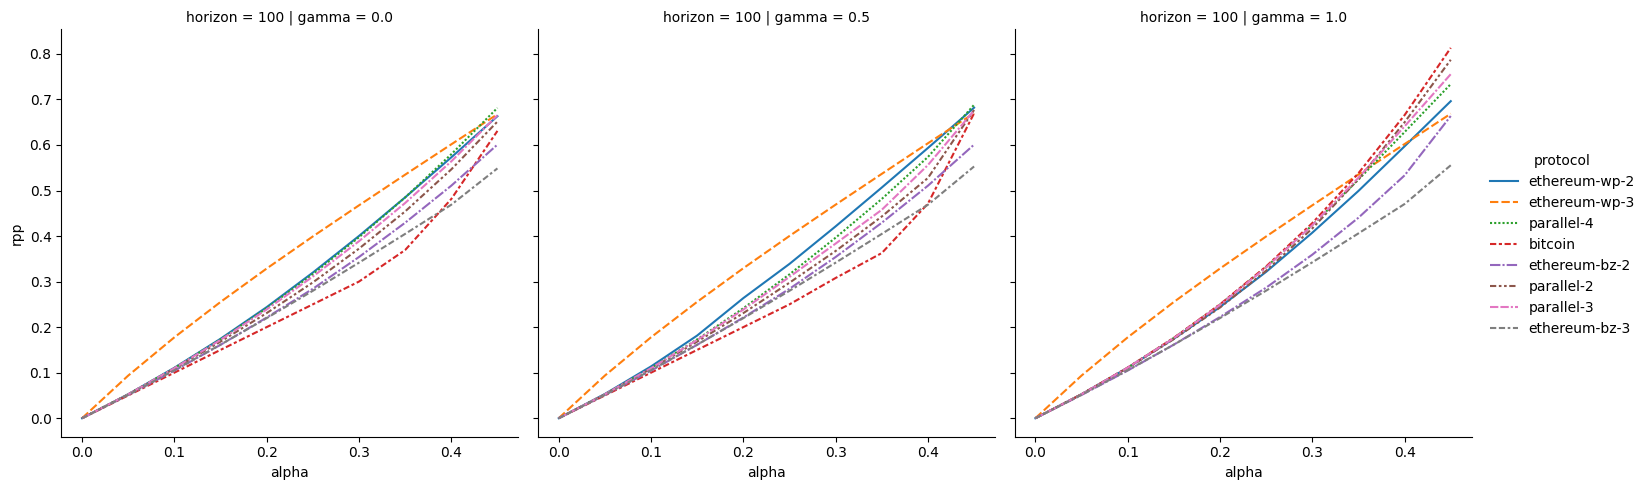

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

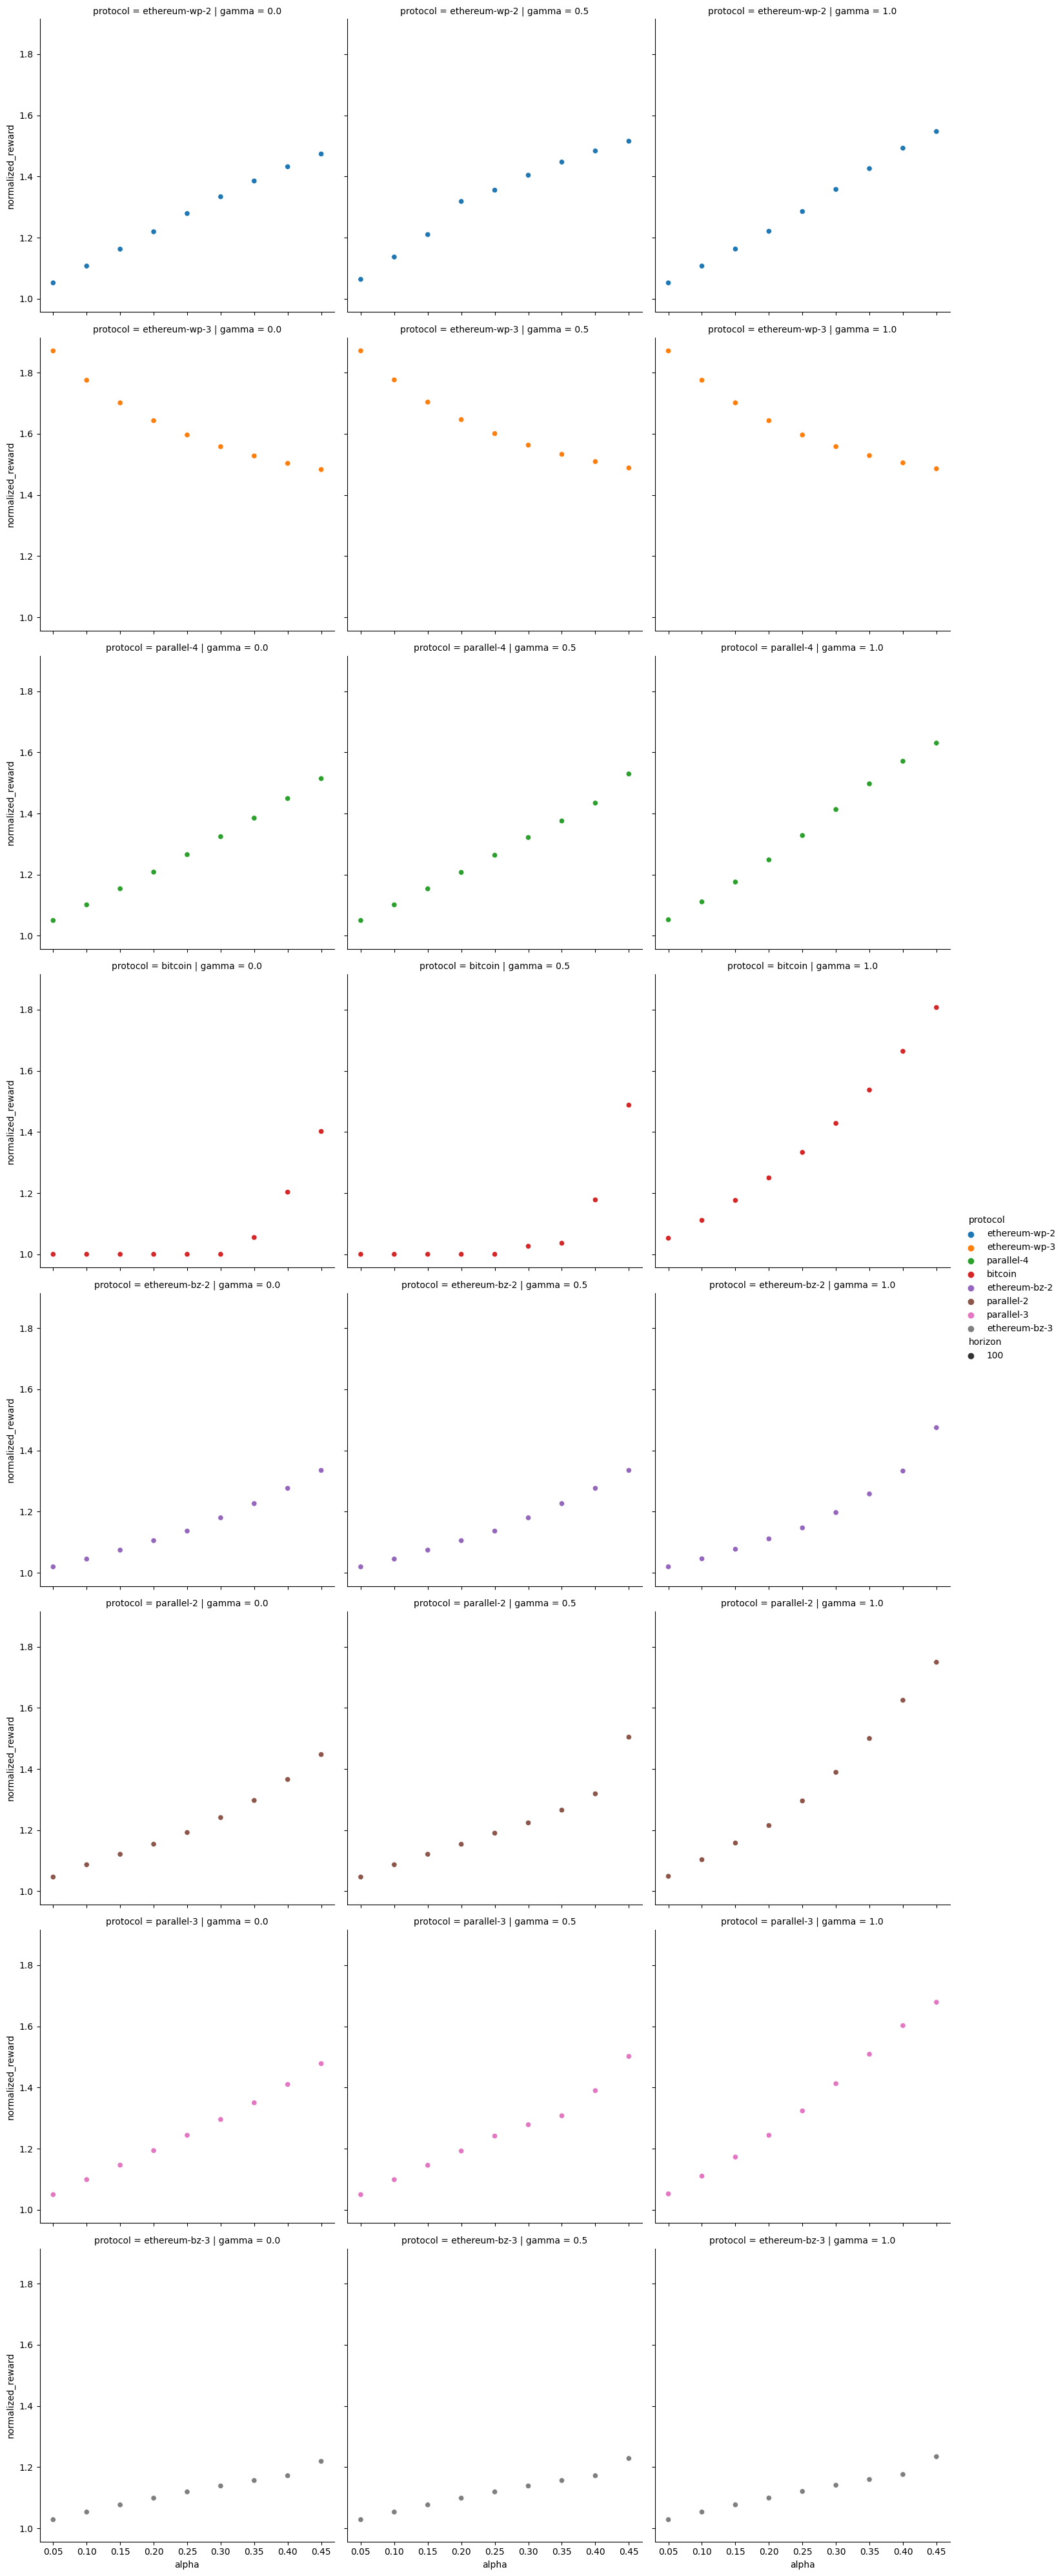

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data.assign(normalized_reward=lambda x: x.rpp / x.alpha),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="protocol",
    hue="protocol",
    style="horizon",
)

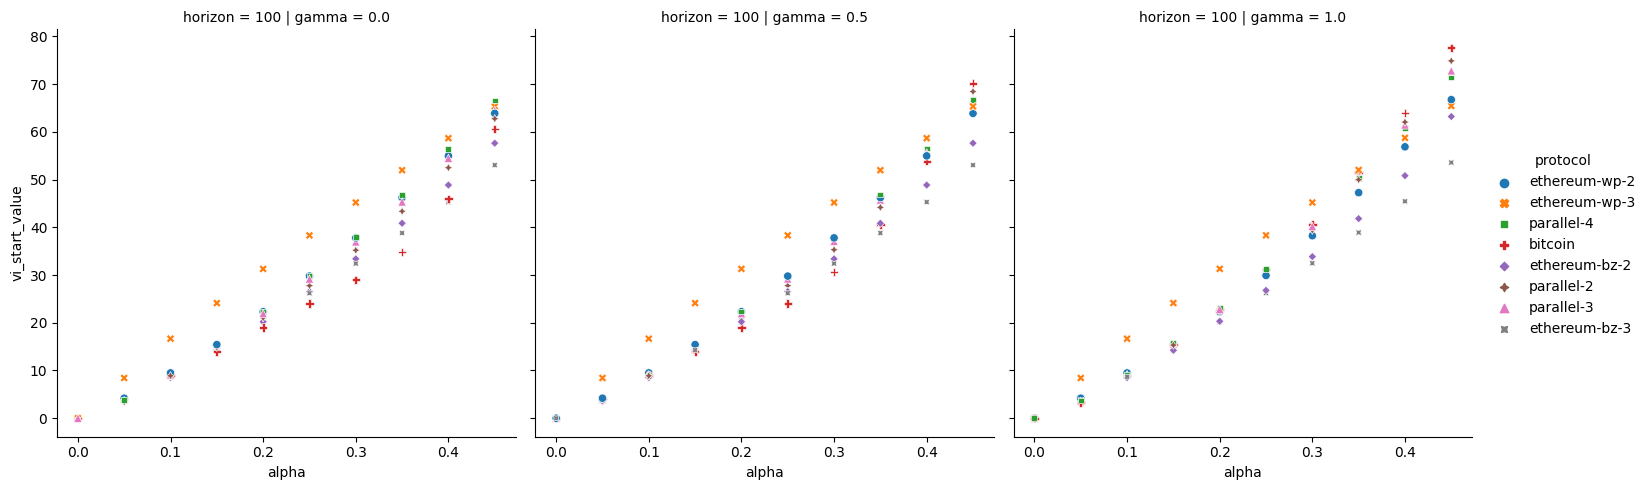

In [6]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="vi_start_value",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

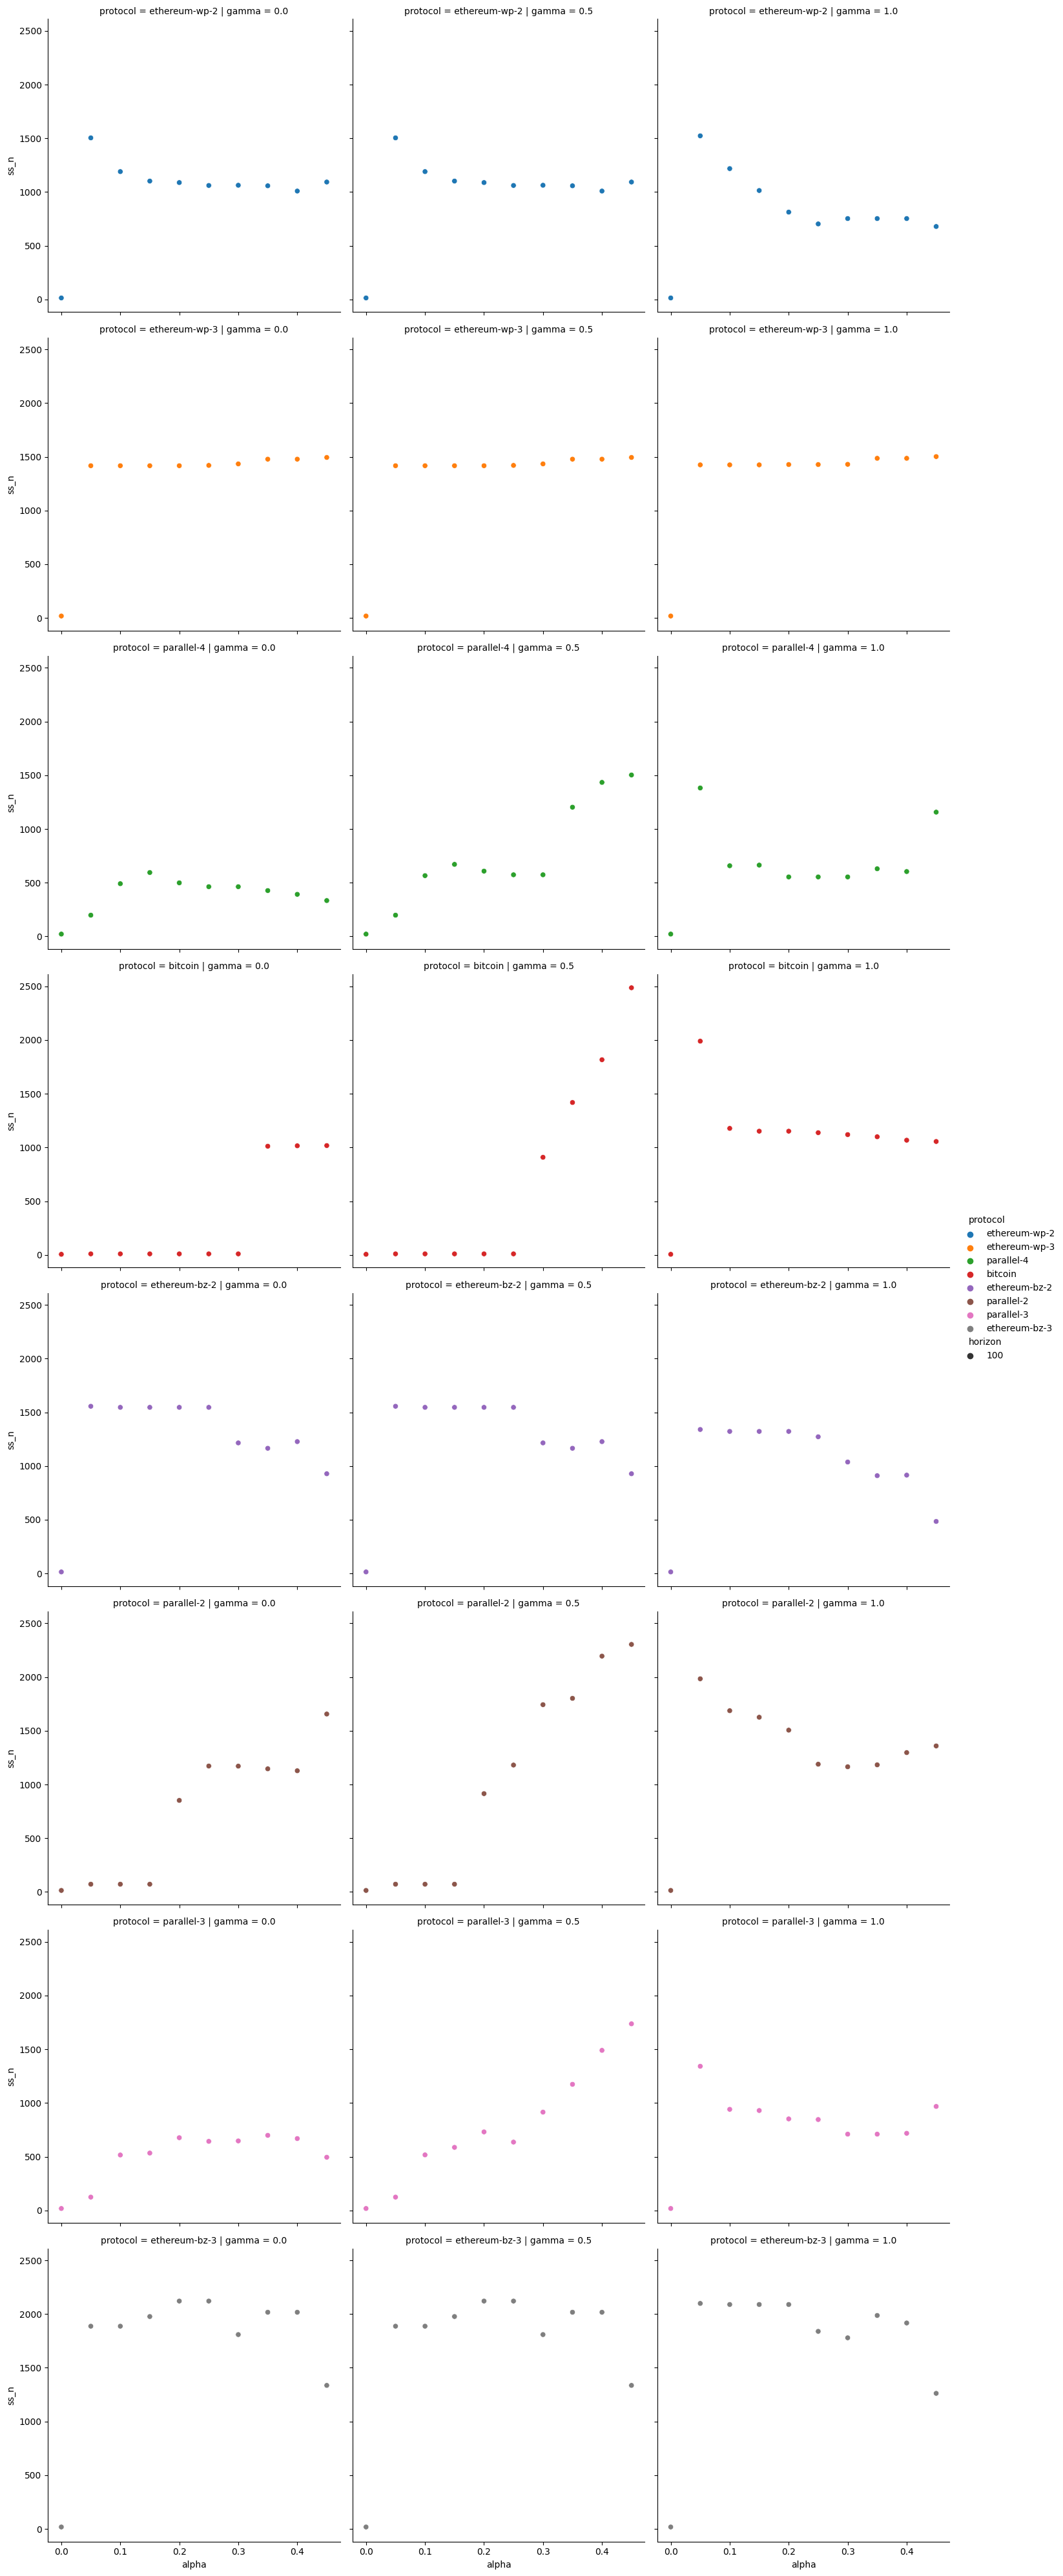

In [7]:
# Compare policy size
sns.relplot(
    data,
    x="alpha",
    y="ss_n",
    col="gamma",
    row="protocol",
    hue="protocol",
    style="horizon",
)